In [269]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('bottle.csv')
df.describe()


,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587269,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [271]:
# Data Exploration 
df.drop(df.iloc[:, 49:67], inplace = True,  axis=1) # Remove repetitive data
# Manually drop unmeanningful columns
df.drop(['Cst_Cnt','Btl_Cnt','Sta_ID','Depth_ID','P_qual','O_qual','T_prec','Phaqua','S_prec','C14A1q','C14A2q','Chlqua','DarkAq','MeanAq','PO4q','NO2q','O2Sat','SiO3qu','SiO3uM','NO3uM','NH3q','O2Satq','NO2uM','ChlorA','Phaeop','RecInd','STheta'], inplace = True,  axis=1)
df.dropna(axis=1, how='all', thresh = df.shape[0]*0.2, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Depthm       864863 non-null  int64  
 1   T_degC       853900 non-null  float64
 2   Salnty       817509 non-null  float64
 3   O2ml_L       696201 non-null  float64
 4   Oxy_µmol/Kg  661268 non-null  float64
 5   PO4uM        413317 non-null  float64
 6   NO3q         529933 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 46.2 MB


,T_degC,Salnty,O2ml_L,Oxy_µmol/Kg,PO4uM,NO3q
Depthm,,,,,,
0,17.945368,33.328358,5.551382,242.426579,0.273026,8.000000
1,19.078000,33.414100,NaN,NaN,NaN,9.000000
2,18.088557,33.348246,5.552525,242.470328,0.272951,8.000000
3,17.337000,33.223908,5.561250,242.890833,0.266667,8.000000
4,17.467333,33.341767,5.488667,239.680000,0.300000,8.000000
5,17.468500,33.395492,5.627333,245.736667,0.340909,8.200000
6,17.382250,33.377275,5.755000,251.327500,0.300000,8.000000
8,18.030000,33.643700,5.803000,253.530000,0.390000,NaN
9,16.994273,33.356782,5.551667,242.436667,0.336667,8.888889


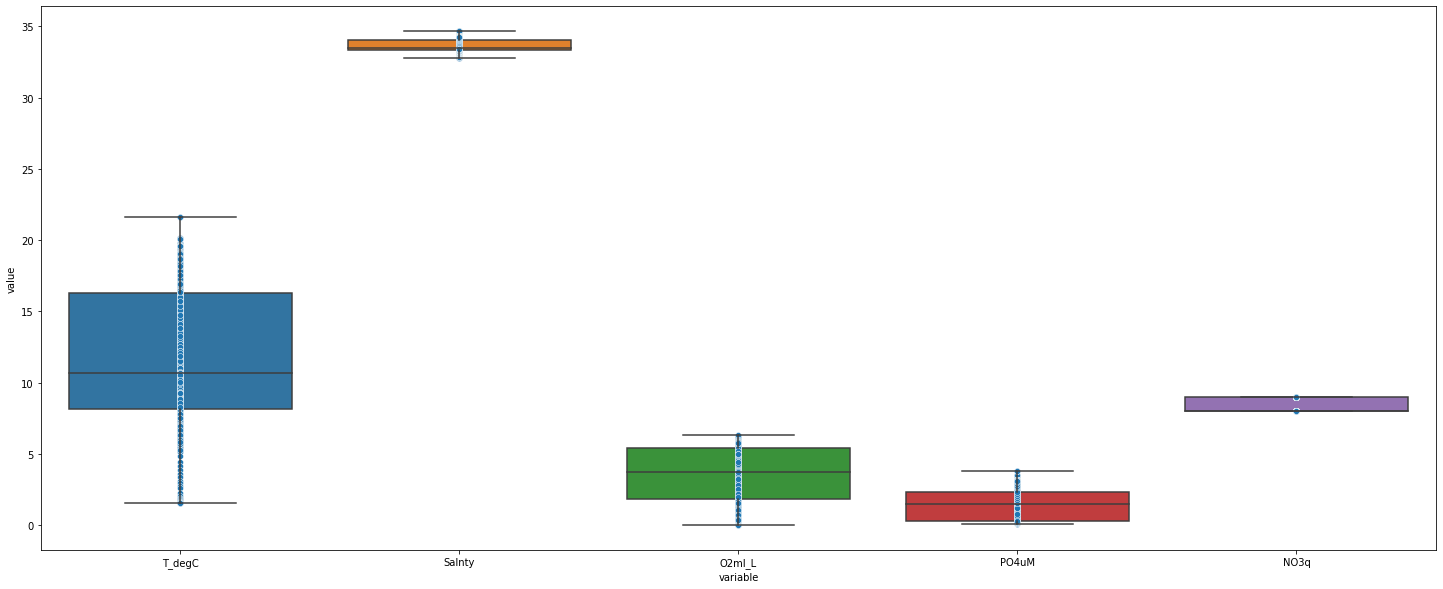

In [281]:
# Q1. How does the data distribute?
smaller_df = df.iloc[-2000:]
plt.subplots(figsize=(25,10))

# The Boxplot of data
indicator_df = smaller_df.drop(['Depthm','Oxy_µmol/Kg'],axis=1)
sns.boxplot(x="variable", y="value", data=pd.melt(indicator_df))
sns.scatterplot(x="variable", y="value", data=pd.melt(indicator_df))

# Q2. How does the data average distribution according to the Depthm
smaller_df.groupby('Depthm').mean()[:50]

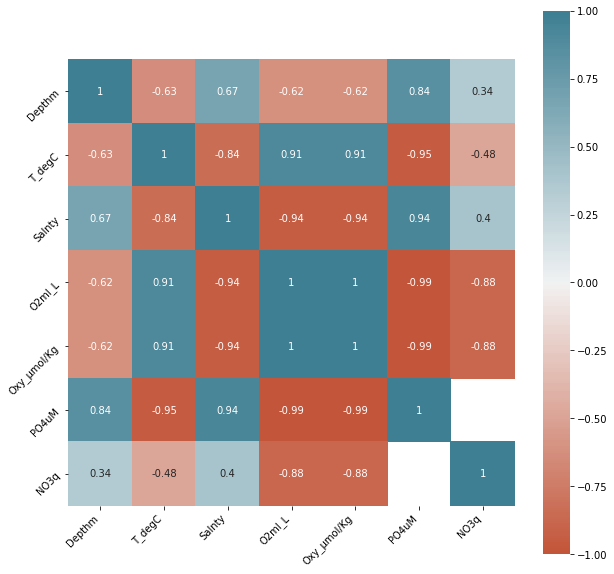

In [273]:
# Take a deeper look of the data with  correlation matrix
dfcopy = smaller_df.copy()
corr = dfcopy.corr()
plt.subplots(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=45,
);

In [283]:
# Given the Depth greater than 1000, what's the probability of temperature is greater than 4
depth_df = df[(df["Depthm"] > 500)]
numerator = len(depth_df[depth_df["T_degC"] >= 4])
denominator = len(depth_df)
numerator / denominator # 73%

# Given the Temperature greater than 4, what's the probability of Salnty is greater than 30
Tem_df = df[(df["T_degC"] > 4)]
numerator = len(depth_df[depth_df["Salnty"] >= 30])
denominator = len(depth_df)
numerator / denominator # 88%

0.8865867435917123

Salnty   -0.921586
T_degC    1.000000
dtype: float64

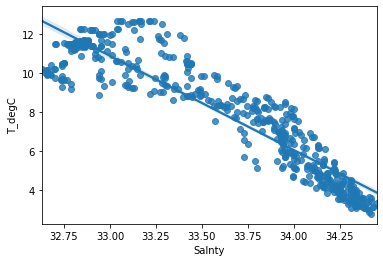

In [112]:
# Data Cleaning
df = df[['Salnty', 'T_deplot']]
df.dropna(axis = 0,inplace = True)
df.shape # (814247, 2) too many data, we just take 500 rows
df = df[:][:500]
df.shape 
sns.regplot(x="Salnty", y="T_degC", data=df);
# From the Graph, we can see there's a correlation between Salnty and Temperature
df.corrwith(df['T_degC']) # -0.921586

In [113]:
from sklearn.model_selection import train_test_split

X = df['Salnty'].values.reshape(-1,1)
y = df['T_degC'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [114]:
from sklearn.linear_model import  LinearRegression

regessor = LinearRegression()
regessor.fit(X_train, y_train)

LinearRegression()

In [115]:
regessor.intercept_
regessor.coef_

array([-4.87174706])

In [116]:
y_pred = regessor.predict(X_test.reshape(-1,1))

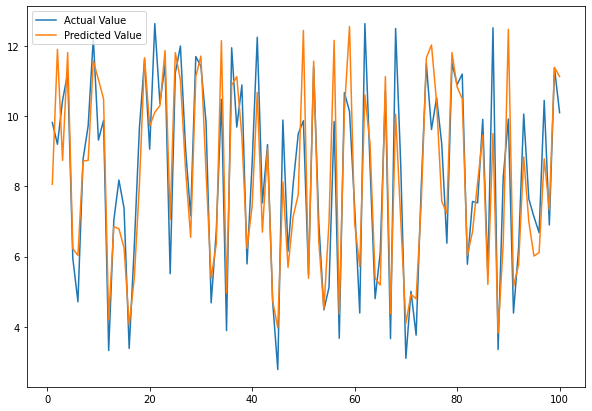

In [286]:
# The Shapes of the redicted value and actual value are similar 

x = np.arange(1, 101, 1)
plt.subplots(figsize=(10,7))
plt.plot(x,y_test,label='Actual Value')
plt.plot(x,y_pred,label='Predicted Value')
plt.legend()

In [117]:
result_df = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred})
result_df

,Actual,Predicted
0,9.82,8.059664
1,9.20,11.903472
2,10.45,8.741709
3,11.23,11.810909
4,5.95,6.223015
...,...,...
95,6.68,6.110965
96,10.45,8.785554
97,6.90,7.328902
98,11.38,11.391939


In [119]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9685083125521003
Mean Squared Error: 1.4573185443037642
Root Mean Squared Error: 1.207194493155003


In [285]:
regessor.score(X_test, y_test) # Accuracy Score = 80.36


0.8036368138617851